In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import argparse
import os
import sys

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
FLAGS = None

In [4]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

with tf.name_scope('scopeA'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([11.0, 12.0, 13.0, 14.0, 15.0, 16.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b, name='stymey')

with tf.name_scope('scopeB'):
    a2 = tf.constant([10.0, 20.0, 30.0, 40.0, 50.0, 60.0], shape=[3, 2], name='a2')
    b2 = tf.constant([.10, .20, .30, .40, .50, .60], shape=[3, 2], name='b2')    
    c2 = tf.matmul(a2, c, name='malph')

with tf.name_scope('init'):
    init_op = tf.global_variables_initializer()
    
    tf.summary.scalar("da_malph", c2)
    merged = tf.summary.merge_all()
    
with tf.Session() as sess:
    #writer = tf.train.SummaryWriter(logs_path, graph=tf.get_default_graph())
    sess.run(init_op)
    # compute the output of the graph
    # c_out = sess.run(c)
    #_, summary = sess.run([c2]) #, summary_op])
    c_out2 = sess.run([c2])
    #@ print("Variable a is {}".format(c_out))
    print("Variable2 a is {}".format(c_out2))

writer = tf.summary.FileWriter(logdir="/tmp/test", graph=sess.graph)
#tensorboard --logdir=\tmp\test

Variable2 a is [array([[  4800.,   5160.],
       [ 10420.,  11200.],
       [ 16040.,  17240.]], dtype=float32)]


In [5]:
help(tf.summary.FileWriter)

Help on class FileWriter in module tensorflow.python.summary.writer.writer:

class FileWriter(SummaryToEventTransformer)
 |  Writes `Summary` protocol buffers to event files.
 |  
 |  The `FileWriter` class provides a mechanism to create an event file in a
 |  given directory and add summaries and events to it. The class updates the
 |  file contents asynchronously. This allows a training program to call methods
 |  to add data to the file directly from the training loop, without slowing down
 |  training.
 |  
 |  Method resolution order:
 |      FileWriter
 |      SummaryToEventTransformer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, logdir, graph=None, max_queue=10, flush_secs=120, graph_def=None, filename_suffix=None)
 |      Creates a `FileWriter` and an event file.
 |      
 |      On construction the summary writer creates a new event file in `logdir`.
 |      This event file will contain `Event` protocol buffers constructed when you
 |      cal

In [6]:
c_out2

[array([[  4800.,   5160.],
        [ 10420.,  11200.],
        [ 16040.,  17240.]], dtype=float32)]

In [8]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [9]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  #display(Image(data=f.getvalue()))
  plt.imshow(a)
  plt.show()

In [11]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [12]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [13]:
xs = tf.constant(Z.astype(np.complex64), name='xs')
zs = tf.Variable(xs, name='zs')
ns = tf.Variable(tf.zeros_like(xs, tf.float32), name='ns')


In [14]:
tf.global_variables_initializer().run()

In [15]:
zs_ = zs*zs + xs

In [16]:
not_diverged = tf.abs(zs_) < 4

In [17]:
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32, name='casty'))
  )

In [18]:
for i in range(200):
    step.run()

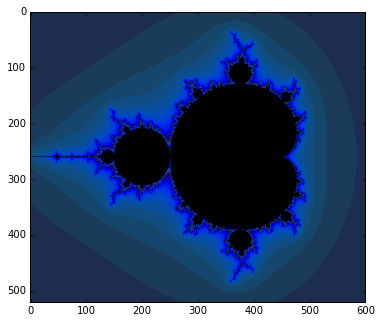

In [19]:
plt.figure(figsize=(6, 6))
DisplayFractal(ns.eval())
plt.show()

In [21]:
writer = tf.summary.FileWriter(logdir="/tmp/test", graph=sess.graph)

In [20]:
sess.close()

In [ ]:
import tensorflow as tf
import numpy as np
#sess = tf.InteractiveSession()  #define a session
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype("float32")
y_data = x_data * 0.1 + 0.3

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

# Launch the graph.
sess = tf.Session()
sess.run(init)

#### ----> ADD THIS LINE <---- ####
writer = tf.summary.FileWriter("/tmp/test", sess.graph)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

# Learns best fit is W: [0.1], b: [0.3]

In [ ]:
import tensorflow as tf
import numpy as np
# reset everything to rerun in jupyter
tf.reset_default_graph()

# config
batch_size = 100
learning_rate = 0.5
training_epochs = 5
logs_path = "/tmp/mnist/2"

# load mnist data set
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# input images
with tf.name_scope('input'):
    # None -> batch size can be any size, 784 -> flattened mnist image
    x = tf.placeholder(tf.float32, shape=[None, 784], name="x-input") 
    # target 10 output classes
    y_ = tf.placeholder(tf.float32, shape=[None, 10], name="y-input")

# model parameters will change during training so we use tf.Variable
with tf.name_scope("weights"):
    W = tf.Variable(tf.zeros([784, 10]))

# bias
with tf.name_scope("biases"):
    b = tf.Variable(tf.zeros([10]))

# implement model
with tf.name_scope("softmax"):
    # y is our prediction
    y = tf.nn.softmax(tf.matmul(x,W) + b)

# specify cost function
with tf.name_scope('cross_entropy'):
    # this is our cost
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# specify optimizer
with tf.name_scope('train'):
    # optimizer is an "operation" which we can execute in a session
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

with tf.name_scope('Accuracy'):
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
# create a summary for our cost and accuracy
tf.scalar_summary("cost", cross_entropy)
tf.scalar_summary("accuracy", accuracy)

# merge all summaries into a single "operation" which we can execute in a session 
summary_op = tf.merge_all_summaries()

with tf.Session() as sess:
    # variables need to be initialized before we can use them
    sess.run(tf.initialize_all_variables())

    # create log writer object
    writer = tf.train.SummaryWriter(logs_path, graph=tf.get_default_graph())
        
    # perform training cycles
    for epoch in range(training_epochs):
        
        # number of batches in one epoch
        batch_count = int(mnist.train.num_examples/batch_size)
        
        for i in range(batch_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            # perform the operations we defined earlier on batch
            _, summary = sess.run([train_op, summary_op], feed_dict={x: batch_x, y_: batch_y})
            
            # write log
            writer.add_summary(summary, epoch * batch_count + i)
            
        if epoch % 5 == 0: 
            print("Epoch: ", epoch)
    print ("Accuracy: ", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print ("done")